In [99]:
import pandas as pd

df1 = pd.read_excel('data-penumpang-bus-transjakarta-tahun-2021-(1764692849646).xlsx')
df1.head()

,periode_data,jenis,kode_trayek,trayek,jumlah_penumpang
0,202101,Angkutan Umum Integrasi,3E,Puri Kembangan - Sentraland Cengkareng,24385
1,202101,Angkutan Umum Integrasi,1R,Senen - Tanah Abang,13518
2,202101,Angkutan Umum Integrasi,1Q,Rempoa - Blok M,29449
3,202101,Angkutan Umum Integrasi,1P,Senen - Bundaran Senayan,8793
4,202101,Angkutan Umum Integrasi,1N,Tanah Abang - Blok M,9987


In [100]:
df1.columns

Index(['periode_data', 'jenis', 'kode_trayek', 'trayek', 'jumlah_penumpang'], dtype='object')

In [101]:
df1['periode_data'].head()

0    202101
1    202101
2    202101
3    202101
4    202101
Name: periode_data, dtype: int64

In [102]:
df1[['jenis']].value_counts()

jenis                  
Mikrotrans                 848
Angkutan Umum Integrasi    469
BRT                        156
Name: count, dtype: int64

In [103]:
df1_BRT = df1[df1['jenis'] == 'BRT'].copy()
df1_Angkutan_Umum_integrasi = df1[df1['jenis'] == 'Angkutan Umum Integrasi'].copy()
df1_Mikrotrans = df1[df1['jenis'] == 'Mikrotrans'].copy()

In [104]:
pd.set_option('display.max_rows', None)
df1_BRT_penumpang = df1_BRT[['periode_data', 'kode_trayek', 'jumlah_penumpang']].sort_values(by=['kode_trayek', 'periode_data']).head()

In [105]:
import calendar

'''FINDING THE AMOUNT OF PASSEGER USING THE BUSES PER DAY (ON AVERAGE)'''

# Extract year and month from periode_data
df1_BRT['year'] = df1_BRT['periode_data'] // 100
df1_BRT['month'] = df1_BRT['periode_data'] % 100

# Get days in month
df1_BRT['days_in_month'] = df1_BRT.apply(
    lambda row: calendar.monthrange(row['year'], row['month'])[1], 
    axis=1
)

# Calculate daily passengers
df1_BRT['jumlah_penumpang_per_day'] = df1_BRT['jumlah_penumpang'] / df1_BRT['days_in_month']

df1_BRT[['periode_data', 'kode_trayek', 'jumlah_penumpang', 'jumlah_penumpang_per_day']].sort_values(by=['periode_data', 'kode_trayek'])

,periode_data,kode_trayek,jumlah_penumpang,jumlah_penumpang_per_day
234,202101,1,773717,24958.612903
233,202101,10,356211,11490.677419
232,202101,11,134632,4342.967742
231,202101,12,137793,4444.935484
230,202101,13,266290,8590.000000
229,202101,2,323751,10443.580645
228,202101,3,444971,14353.903226
227,202101,4,249575,8050.806452
226,202101,5,400573,12921.709677
225,202101,6,320411,10335.838710


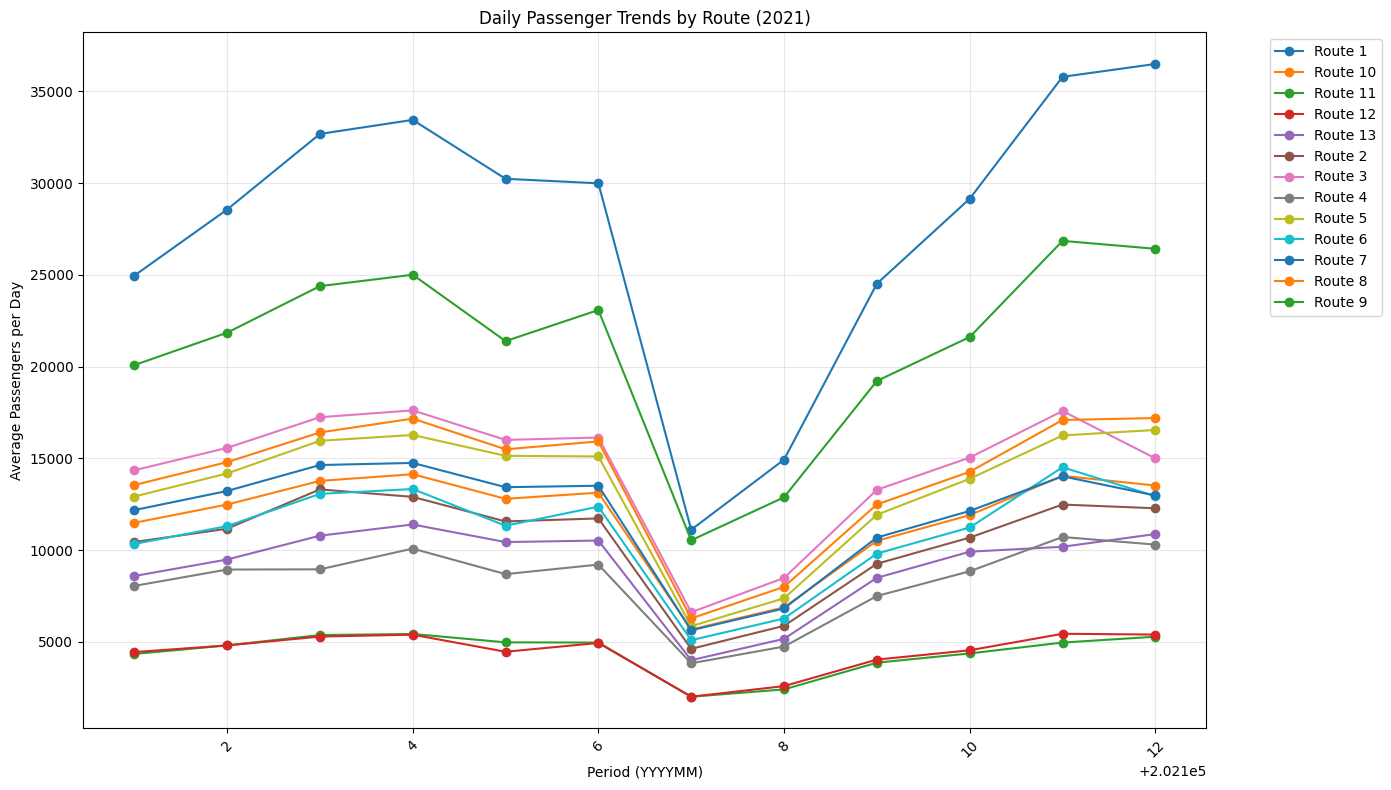

In [106]:
import matplotlib.pyplot as plt
# Plot trends for each route separately
plt.figure(figsize=(14, 8))

for route in sorted(df1_BRT['kode_trayek'].unique()):
    route_data = df1_BRT[df1_BRT['kode_trayek'] == route].groupby('periode_data')['jumlah_penumpang_per_day'].mean()
    plt.plot(route_data.index, route_data.values, marker='o', label=f'Route {route}')

plt.xlabel('Period (YYYYMM)')
plt.ylabel('Average Passengers per Day')
plt.title('Daily Passenger Trends by Route (2021)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [107]:
# Add the bus stops as each node of the graph
stops = pd.read_csv('gtfs/stops.txt')

In [112]:
stop_times = pd.read_csv('gtfs/stop_times.txt')
trips = pd.read_csv('gtfs/trips.txt')
routes = pd.read_csv('gtfs/routes.txt')

# Merge to get route information for each stop
network = stop_times.merge(trips, on='trip_id')

# Filter for main corridor routes (1-13)
network = network[network['route_id'].isin([str(i) for i in range(1, 14)])]

# Get average daily passenger capacity per route
capacity_per_route = df1_BRT.groupby('kode_trayek')['jumlah_penumpang_per_day'].mean().to_dict()

print(f"Total stops: {len(stops)}")
print(f"Total network connections: {len(network)}")
print(f"\nSample stops:")
print(stops[['stop_id', 'stop_name']].head(10))

Total stops: 5365
Total network connections: 17046

Sample stops:
                 stop_id           stop_name
0                 Blok M  Blok M, platform 1
1              166879179        Masjid Agung
2   1-3 Bundaran Senayan    Bundaran Senayan
3  1-4 Gelora Bung Karno   Gelora Bung Karno
4   1-5 Polda Metro Jaya    Polda Metro Jaya
5    1-6 BENDUNGAN HILIR     Bendungan Hilir
6              1-7 KARET      Karet Sudirman
7       1-8 DUKUH ATAS 1        Dukuh Atas 1
8             1-9 TOSARI              Tosari
9              425957666         Bundaran HI
